# Quantum Phase Estimation
### Problem
Let $U$ be a unitary operator, the algorithm estimates $\theta$ in
$$
U|\psi\rangle=e^{2\pi i \theta}|\psi\rangle
$$
Since U is a unitary operator, it is guaranteed that the eigenvalue would be of that particular form because they always have norm of unity.
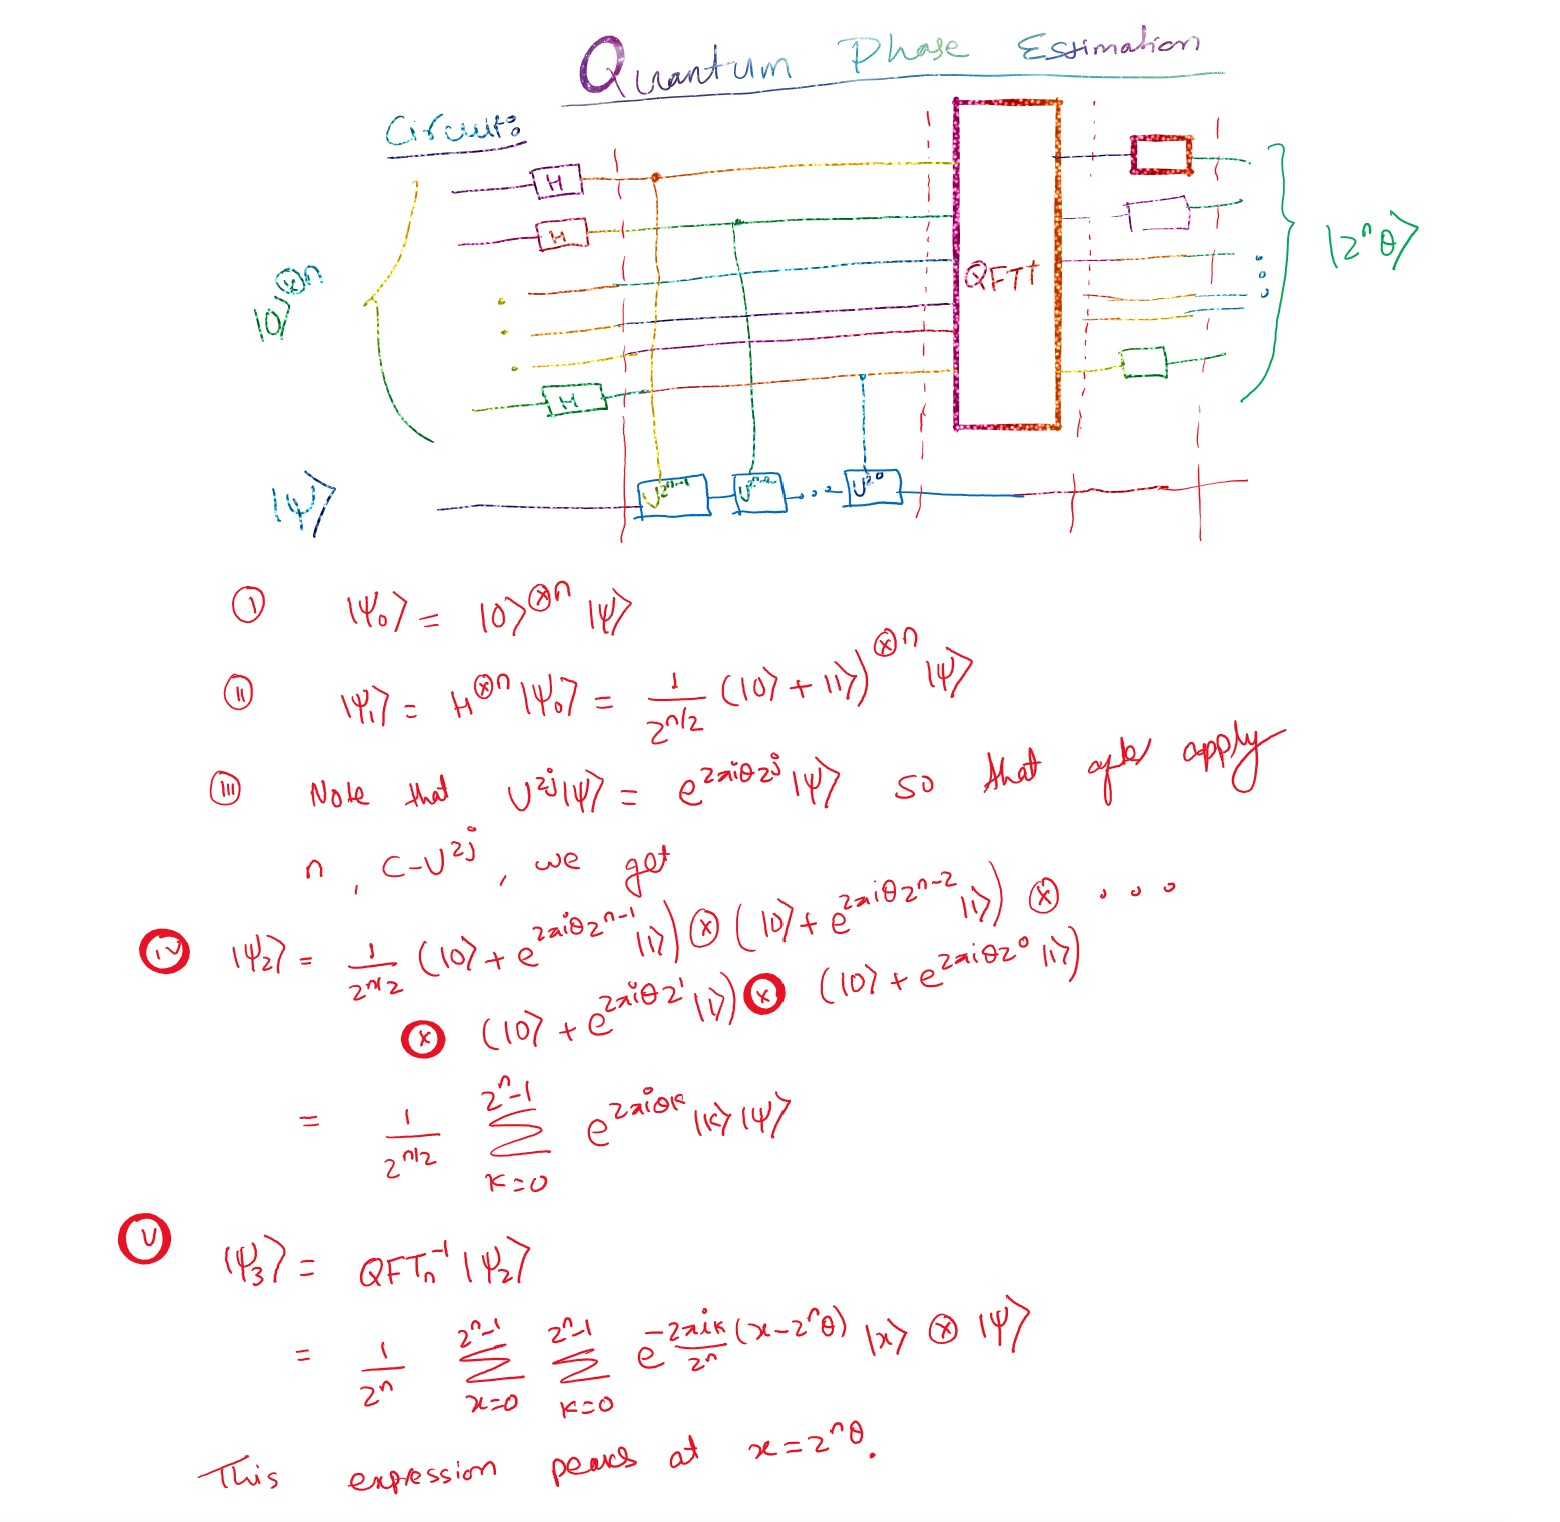
### Example: T-gate
We recall that,
$$
T|1\rangle=e^{2i\pi\theta}|1\rangle
$$so that
$ \theta=\frac{1}{8} $

In [1]:
# Initialization and Imports
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

In [23]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

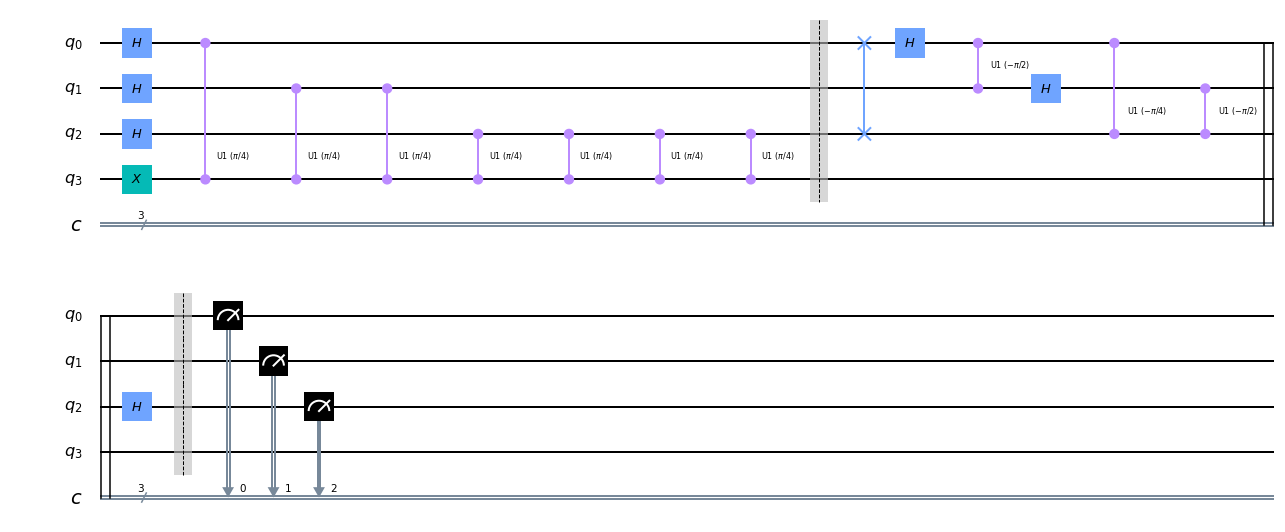

In [11]:
# Initiating
qpe = QuantumCircuit(4,3)
qpe.x(3) # the eigenvector

#Applying Hadamard gates to the counting qubits
for qubit in range(3):
    qpe.h(qubit)
    
# Appyling T-gates
repititions = 1
for counting_qubit in range(3):
    for i in range(repititions):
        qpe.cu1(math.pi/4, counting_qubit, 3)
    repititions *= 2
        
# Applying  Inverse QFT
qpe.barrier()
qft_dagger(qpe,3)
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

qpe.draw('mpl')

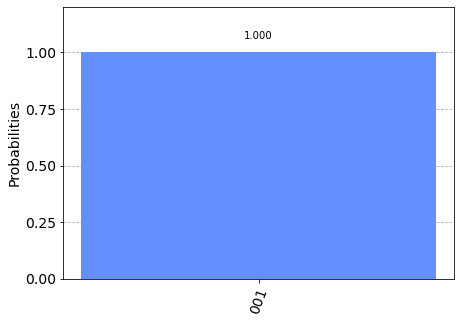

In [12]:
# Results
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

## Getting Precision
Instead of using a T-gate, let's use a gate with $\theta=\frac{1}{3}$.

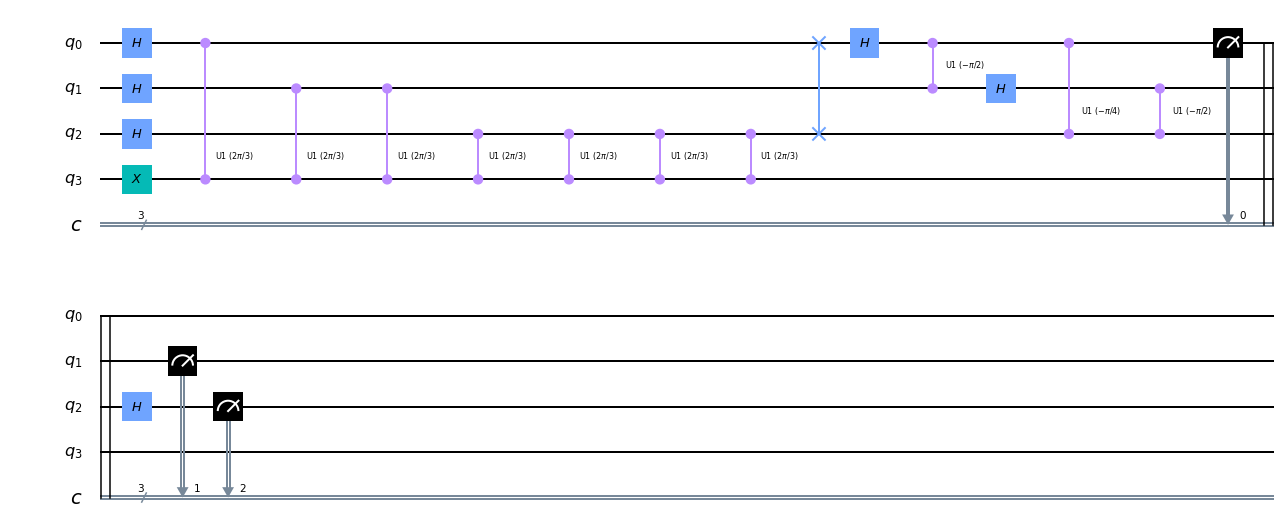

In [13]:
# Setting the circuit up
qpe2 = QuantumCircuit(4,3)

#Applying Hadamard gates to counting qubits
for qubit in range(3):
    qpe2.h(qubit)
    
#the eigenvector
qpe2.x(3)

# controlled- operations
angle = 2*math.pi/3
repititions = 1
for counting_qubit in range(3):
    for i in range(repititions):
        qpe2.cu1(angle, counting_qubit, 3)
    repititions *= 2
    
# Inverse QFT
qft_dagger(qpe2, 3)

# Measure
for n in range(3):
    qpe2.measure(n,n)
    
qpe2.draw('mpl')

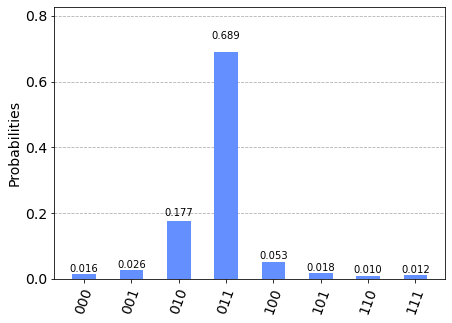

In [14]:
# Let's see the results!
backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe2, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

We see that the result with highest probability is $011 = 3$, which means that $\theta=\frac{3}{8}=0.375$, an error of about 14%.
Now, lets increase the number of counting qubits.

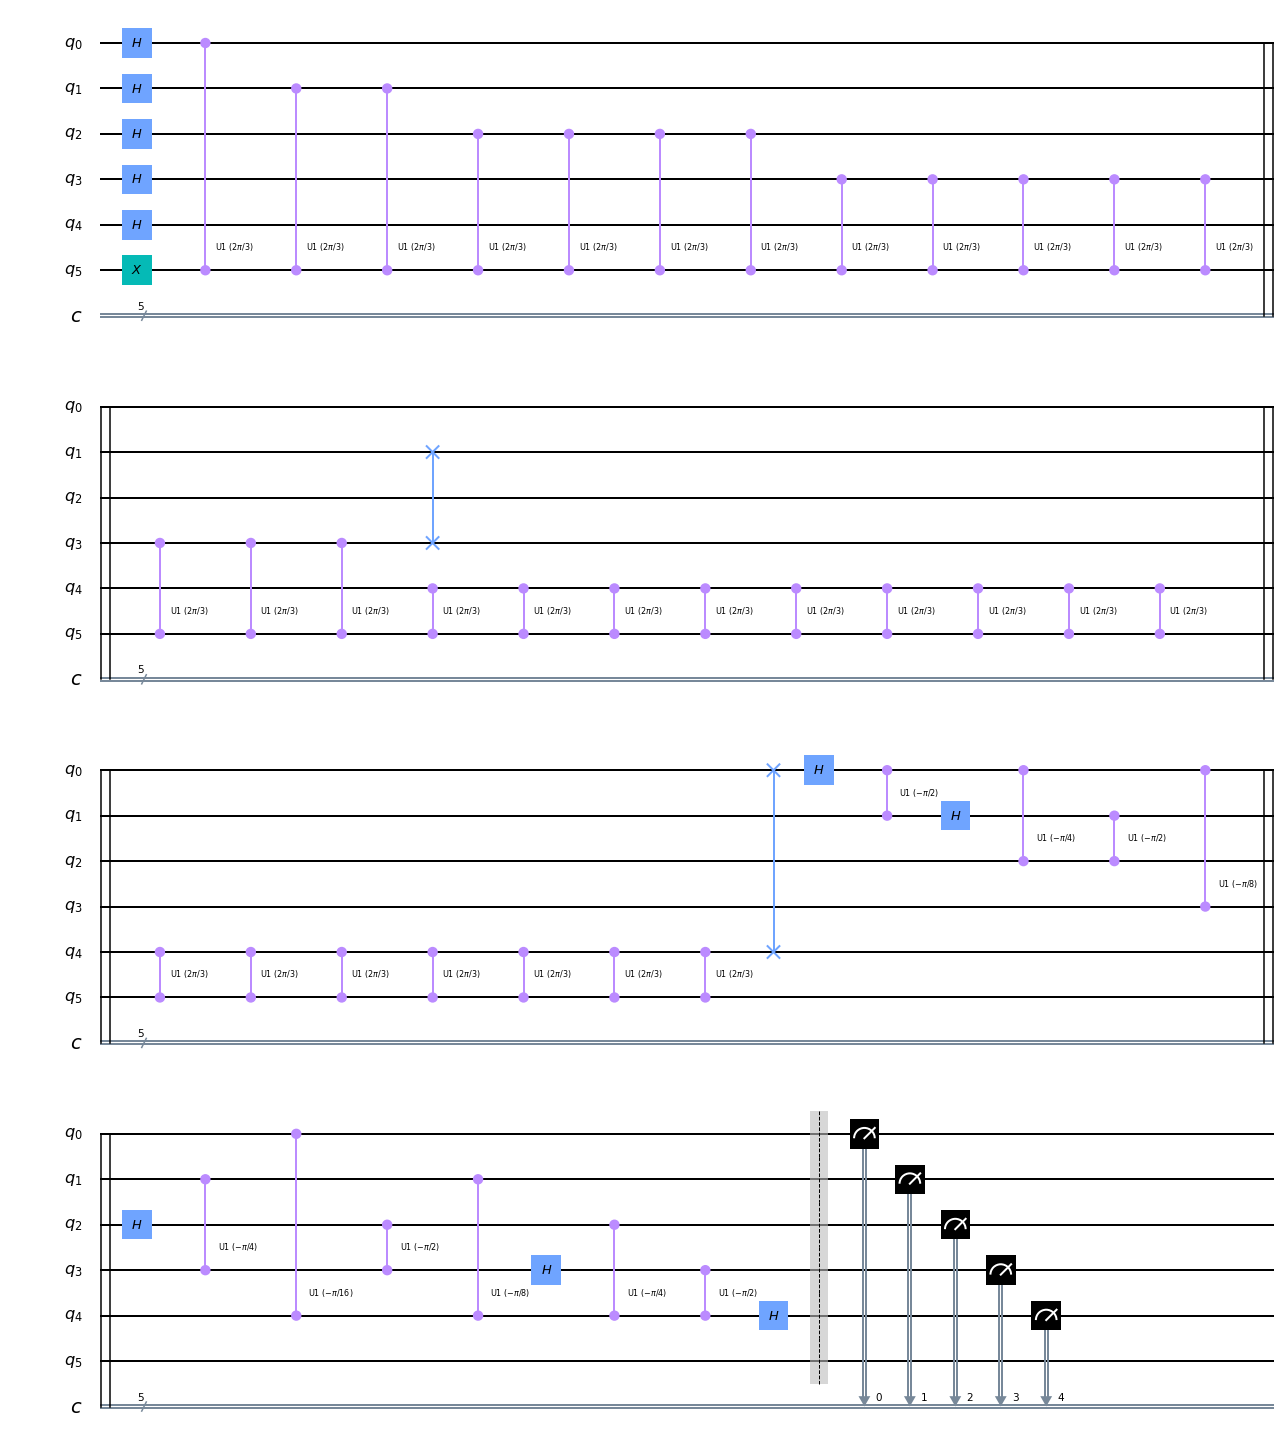

In [24]:
# Setting the circuit up
qpe3 = QuantumCircuit(6,5)

#Applying Hadamard gates to counting qubits
for qubit in range(5):
    qpe3.h(qubit)
    
#the eigenvector
qpe3.x(5)

# controlled- operations
angle = 2*math.pi/3
repititions = 1
for counting_qubit in range(5):
    for i in range(repititions):
        qpe3.cu1(angle, counting_qubit, 5)
    repititions *= 2
    
# Inverse QFT
qft_dagger(qpe3, 5)

# Measure
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)
    
qpe3.draw('mpl')

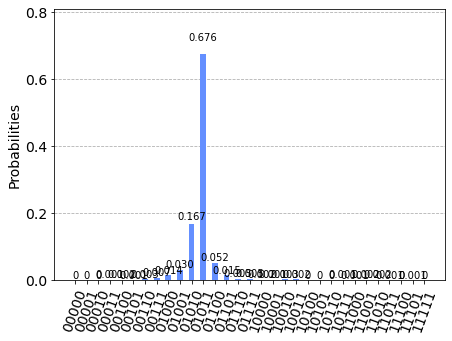

In [25]:
### Let's see the results!

backend = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(qpe3, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

Now $01011 = 11$ gives $\theta=0.34375$, with error, about 3%, a much better result.

## Experiment with Real Device

In [26]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to n qubits
IBMQ.load_account()
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_vigo')

# Run with 2048 shots
shots = 2048
job = execute(qpe, backend=backend, shots=2048, optimization_level=3)
job_monitor(job)

Job Status: job has successfully run


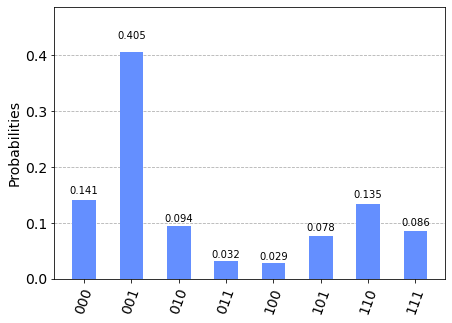

In [27]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe)
plot_histogram(answer)